In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
df = pd.read_csv("ScamIPs.csv")

In [3]:
list(df)

['Address',
 'Domain',
 'Alias',
 'Name',
 'status',
 'country',
 'countryCode',
 'region',
 'regionName',
 'city',
 'zip',
 'lat',
 'lon',
 'timezone',
 'isp',
 'org',
 'as',
 'query',
 'message']

In [4]:
def CountSeq(seq):
    seq_dict = {}
    
    for item in seq:
        # remove nan
        if item != item:
            continue
        
        seq_dict[item] = seq_dict.get(item, 0) + 1
    
    return seq_dict

**Country**

In [56]:
country_dict = CountSeq(df['country'])
other_AA = ['Philippines','Taiwan','Cambodia','Thailand']
other_EU = ['Ukraine','Bulgaria','France','Ireland','Czech Republic']
other = ['Iran', 'Brazil', 'South Africa']

for key in list(country_dict.keys()):
    if key in other_AA:
        country_dict['Asia Other'] = country_dict.get('Asia Other', 0) + country_dict[key]
        country_dict.pop(key)
    elif key in other_EU:
        country_dict['Europe Other'] = country_dict.get('Europe Other', 0) + country_dict[key]
        country_dict.pop(key)
    elif key in other:
        country_dict['Other'] = country_dict.get('Other', 0) + country_dict[key]
        country_dict.pop(key)

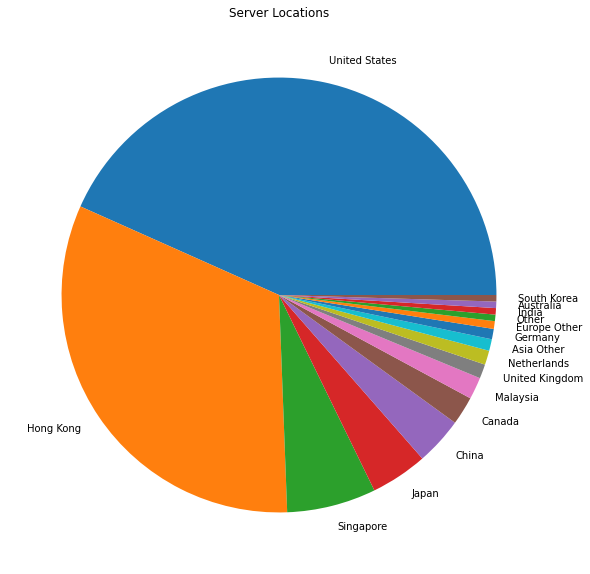

In [57]:
labels = list(country_dict.keys())
idx = np.argsort([country_dict[x] for x in labels])[::-1]
labels = [labels[x] for x in idx]
values = [country_dict[x] for x in labels]

plt.subplots(figsize=(10,10))
plt.pie(values, labels=labels)
plt.title('Server Locations')
plt.show()

**ISP**

Notes: Internet Service Provider contains all of the IPs within a certain range. So when we access the the IP address we also get information about who the ISP is. The organization is a subbranch of the ISP. If they are really huge, like a university or think of Amazon-us-west, then that will appear as the ISP, but it is actually the organization. Lastly, there is something called Autonomous system. That is a system that can include multiple ISPs, but typically rope together the same company that might be part of some international conglomerate.

In [59]:
isp_dict = CountSeq(df['as'])

In [60]:
common = ['Amazon','Tencent','Alibaba','Godaddy','Wix','Microsoft','Baidu','Google','CloudFlare','Namecheap','Namesilo','Huawei', 'Yisu Cloud']
list_keys = list(isp_dict.keys())

for key in list_keys:
    for name in common:
        if name.upper() in key.upper():
            isp_dict[name + " Family"] = isp_dict.get(name + " Family",0) + isp_dict[key]
            isp_dict.pop(key)
        elif 'Taobao' in key:
            isp_dict['Alibaba Family'] = isp_dict.get('Alibabay Family', 0) + isp_dict[key]

In [61]:
small_isp = []
list_keys = list(isp_dict.keys())

for key in list_keys:
    if isp_dict[key] <= 2:
        small_isp.append(key)
        isp_dict.pop(key)

In [153]:
def removeAN(name_str):
    pattern = '[AS]+[0-9]+'
    if len(re.findall(pattern,name_str)) > 0:
        split_name = name_str.split(' ')[1:]
        return ' '.join(split_name)
    else:
        return name_str

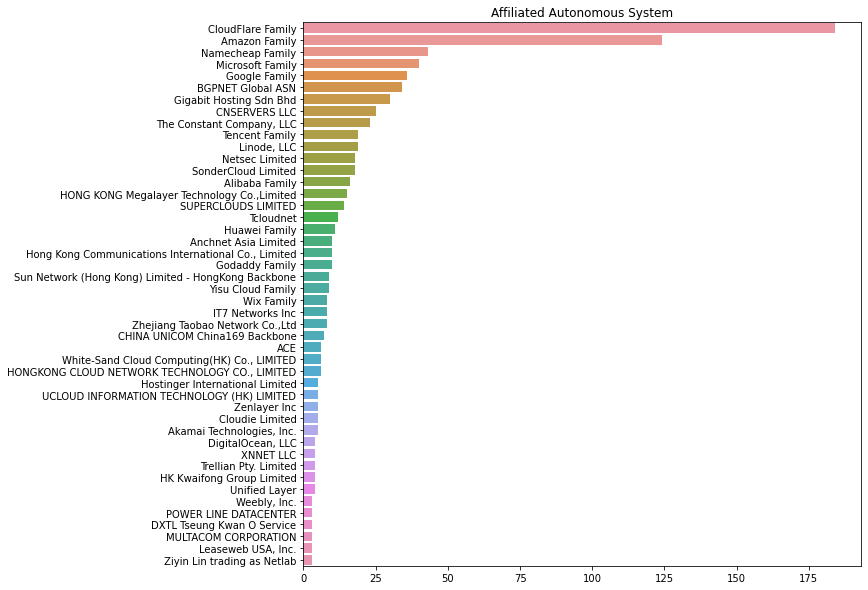

In [155]:
labels = list(isp_dict.keys())
idx = np.argsort([isp_dict[x] for x in labels])[::-1]
labels = [labels[x] for x in idx]
values = [isp_dict[x] for x in labels]
labels = [removeAN(x) for x in labels]

plt.subplots(figsize=(10,10))
sns.barplot(x = values, y = labels)
plt.title('Affiliated Autonomous System')
plt.show()

In [158]:
', '.join(small_isp)

'AS138195 MOACK.Co.LTD, AS395886 KURUN CLOUD INC, AS206638 PE Brezhnev Daniil, AS16276 OVH SAS, AS44901 Belcloud LTD, AS32244 Liquid Web, L.L.C, AS46844 Sharktech, AS26347 New Dream Network, LLC, AS9584 Diyixian.com Limited, AS19324 Dosarrest Internet Security LTD, AS136146 Beijing 3389 Network Technology Co., Ltd., AS55799 IPTELECOM ASIA, AS137969 HONG KONG BRIDGE INFO-TECH LIMITED, AS8622 Namesco Limited, AS135357 Shenzhen Katherine Heng Technology Information Co., Ltd., AS19551 Incapsula Inc, AS7794 Execulink Telecom Inc., AS23650 AS Number for CHINANET jiangsu province backbone, AS63916 IPTELECOM Global, AS139021 West263 International Limited, AS43541 VSHosting s.r.o., AS29538 LINKOTELUS, UAB, AS43092 Kirin Communication Limited, AS22769 DDOSING NETWORK, AS35913 DediPath, AS42960 VH Global Limited, AS395082 Bodis, LLC, AS36352 ColoCrossing, AS132721 Ping Global Amsterdam POP ASN, AS32613 iWeb Technologies Inc., AS398968 INTERCONTINENTAL INTERNET DATA CORP, AS206834 Team Internet AG

**City**

In [ ]:
city_dict = {}
    
for i in range(df.shape[0]):
    row = df.iloc[i]

    if row['country'] == 'Hong Kong' or row['country'] == 'Singapore':
        city_item = row['country']
    else:
        city_item = row['city']

    if city_item != city_item: # still nan
        continue

    city_dict[city_item] = city_dict.get(city_item, 0) + 1

In [39]:
cities = list(city_dict.keys())
idx = np.argsort([city_dict[x] for x in cities])[::-1]

In [48]:
cities = [cities[x] for x in idx]
values = [city_dict[x] for x in cities]

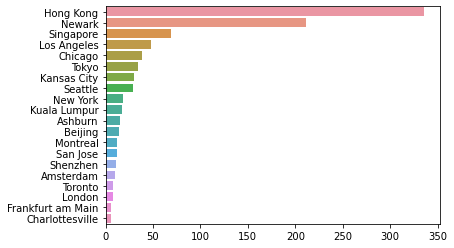

In [58]:
sns.barplot(x=values[:20],y=cities[:20])
plt.savefig('Domain Server City.png')
plt.show()

plot servers

In [ ]:
!python -m pip install geopandas

In [170]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file('/content/geo_export_1f88d1b8–51fd-42aa-84b0–22d7bad6bc6f.shp')

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# designate coordinate system
crs = {‘init’:’espc:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df[‘longitude’], df[‘latitude’])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,
 crs = crs,
 geometry = geometry)